## Astrodinámica para Ingeniería Aeroespacial
### Prof. Jorge I. Zuluaga
### Instituto de Física - Universidad de Antioquia

## Clase 2 - Repaso de Mecánica Celeste (parte 2)
<a target="_blank" href="https://colab.research.google.com/github/seap-udea/notas-astrodyn/blob/main/Clase-02-astrodyn-repaso_celeste_2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Antes de comenzar

In [1]:
import matplotlib.pyplot as plt

# Esto solo se tiene que correr en VisualCode
import sys
if 'google.colab' not in sys.modules:
    # Para que funcione en visual code instalar ipympl
    %matplotlib widget
    %matplotlib widget 

## El problema de los dos cuerpos en el tiempo

- La teoría básica está explicada en [la presentación preparada por el profesor](https://docs.google.com/presentation/d/1Dm0xWd8F5lbPR4yA9gLh6tEbj7stIiX5DIv6q09rkkk/edit#slide=id.g22038ed91f1_0_463). Aquí solamente recogeremos algunos elementos prácticos.

### La ecuación de Halley

- La primera solución al problema de los dos cuerpos se produce cuando describimos el movimiento de un cuerpo sobre una parábola, es decir cuando e = 1.

- Recordemos que esta situación es muy particular y solo se produce en el caso en el que la rapidez del cuerpo es exactamente igual a la velocidad de escape.

- En este caso la anomalía verdadera del cuerpo sobre su órbita se calcula en cualquier tiempo $t$ usando la ecuación de Halley:

 $$
 \sqrt{\frac{\mu}{p^3}}\left(t-t_p\right)=\frac{1}{2} \tan \frac{f}{2}+\frac{1}{6} \tan ^3 \frac{f}{2}
 $$

- Para ilustrar el uso de esta ecuación tomemos el caso de un cuerpo por ejemplo que orbita al Sol (un cometa) y que pasa por el punto más cercano a él a una distancia $q=0.4$ au (unidades astronómicas). Para empezar calculemos la velocidad de escape del Sol a esa distancia:

  $$
  v_e = \sqrt{\frac{2GM}{r}}
  $$

- Para ello nos valdremos de las herramientas que vienen con el paquete `pymcel` desarrollado por el profesor para su libro. Para usar el paquete debemos instalarlo e importarlo:

In [2]:
!pip install -Uq pymcel
import pymcel as pc

Paquete pymcel cargado. Versión: 0.6.2


- En el paquete encontramos constantes como la unidad astronómica:

In [3]:
pc.constantes.au

149597870700.0

- El paquete viene con constantes útiles que nos permiten calcular la velocidad de escape del Sol:

In [4]:
import numpy as np

q = 0.4*pc.constantes.au
ve = np.sqrt(2*pc.constantes.G*pc.constantes.M_sun/q)

print(f"Velocidad de escape: {ve:g} m/s = {ve/1e3:+20.3e} km/s")

Velocidad de escape: 66600.6 m/s =           +6.660e+01 km/s


- Imaginemos que escogemos como sistema de coordenadas el sistema natural de la cónica (la parábola) y definimos la posición y velocidad inicial del cometa usando:

In [6]:
rvec = np.array([q, 0, 0])
r = np.linalg.norm(rvec)
r = (rvec@rvec)**0.5 # Otra forma de calcular

vvec = np.array([0, ve, 0])
v = np.linalg.norm(vvec)

mu = pc.constantes.G*pc.constantes.M_sun

mu

1.3271244e+20

- Comparemos el tiempo que le toma a los dos métodos mostrados calcular la magnitud:

In [7]:
%timeit np.linalg.norm(rvec)
%timeit (rvec@rvec)**0.5

2.03 µs ± 276 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
1.1 µs ± 111 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


- Con los valores del vector de estado podemos calcular las constantes:

In [8]:
hvec = np.cross(rvec, vvec)
h = np.linalg.norm(hvec)

epsilon = v**2/2 - mu/r

evec = np.cross(vvec, hvec)/mu - rvec/r
e = np.sqrt(1 + 2*epsilon*h**2/mu**2)

print(f"Momentum angular específico: {h}")
print(f"Energía específica: {epsilon}")
print(f"Vector de Laplace: {evec}")
print(f"Excentricidad (fórmula): {e}")
print(f"Excentricidad (magnitud vector de Laplace): {(evec@evec)**0.5}")

Momentum angular específico: 3985322916843904.0
Energía específica: -4.76837158203125e-07
Vector de Laplace: [1. 0. 0.]
Excentricidad (fórmula): 0.9999999999999996
Excentricidad (magnitud vector de Laplace): 0.9999999999999996


- Que es justamente lo que estabamos esperando obtener.

#### Las unidades canónicas

- Los valores obtenidos en el cálculo anterior se pueden simplificar mucho si se usan *unidades canónicas*, es decir, unidades para las cuáles $G = 1$. 

- Es posible mostrar que el valor de los factores de conversión $U_L, U_M, U_T$ para las unidades canónicas satisfacen la ecuación:

  $$
  G = \frac{U_L^3}{U_M U_T^2}
  $$
  de modo que si yo fijo dos de estos factores, el tercero sale sin inconvenientes. 

- En el problema que tenemos podemos hacer:

In [9]:
UL = 1*pc.constantes.au
UM = 1*pc.constantes.M_sun

G = pc.constantes.G

UT = np.sqrt(UL**3/(G*UM))
UT

5022642.891706651

- Una vez fijadas las unidades canónicas todos los cálculos de antes se simplifican mucho:

In [10]:
mu = 1 # Como G = 1 y escogimos como unidad de masa la masa solar

q = 0.4 # en au 
ve = np.sqrt(2*mu/q)

# Posición y velocidad inicial
rvec = np.array([q, 0, 0])
r = np.linalg.norm(rvec)

vvec = np.array([0, ve, 0])
v = np.linalg.norm(vvec)

# Constantes de movimiento
hvec = np.cross(rvec, vvec)
h = np.linalg.norm(hvec)

epsilon = v**2/2 - mu/r

evec = np.cross(vvec, hvec)/mu - rvec/r
e = np.sqrt(1 + 2*epsilon*h**2/mu**2)

print(f"Momentum angular específico: {h}")
print(f"Energía específica: {epsilon}")
print(f"Vector de Laplace: {evec}")
print(f"Excentricidad: {e}")

Momentum angular específico: 0.894427190999916
Energía específica: 4.440892098500626e-16
Vector de Laplace: [1. 0. 0.]
Excentricidad: 1.0000000000000002


#### Solución a la ecuación de Halley

- Apliquemos la ecuación de Halley:

   $$
   \sqrt{\frac{\mu}{p^3}}\left(t-t_p\right)=\frac{1}{2} \tan \frac{f}{2}+\frac{1}{6} \tan ^3 \frac{f}{2}
   $$
  para predecir dónde estará el cometa en un tiempo futuro, por ejemplo $t = 10.0$ unidades canónicas que corresponden en segundos a:

In [11]:
10*UT

50226428.917066514

- Y en días y años a:

In [12]:
10.0*UT/pc.constantes.día, 10*UT/pc.constantes.año

(581.3244087623439, 1.5915794901090867)

- Para resolver la ecuación de Kepler podemos usar el método de Newton:

In [13]:
t = 10
tp = 0
p = h**2/mu

ecuacion_halley = lambda f: np.sqrt(mu/p**3)*(t-tp) - 1/2*np.tan(f/2) - 1/6*np.tan(f/2)**3

from scipy.optimize import bisect
f = bisect(ecuacion_halley,0,np.pi)

print(f"Anomalía verdadera: {f*180/np.pi:g} grados")

Anomalía verdadera: 152.896 grados


- De este modo puedo finalmente predecir la distancia a la que estará el cometa del Sol:

In [15]:
r = p/(1 + e*np.cos(f))

print(f"Distancia al sol: {r:g} unidades canónicas (au)")

Distancia al sol: 7.2847 unidades canónicas (au)


- O el vector de estado completo:

In [16]:
x = r*np.cos(f)
y = r*np.sin(f)
z = 0

vx = -mu/h*np.sin(f)
vy = mu/h*(e + np.cos(f))
vz = 0

print(f"Vector de estado: {[x, y, z, vx, vy, vz]} (en unidades canónicas)")

Vector de estado: [-6.484698093213715, 3.318963234075059, 0, -0.5093846931781589, 0.12278164167615273, 0] (en unidades canónicas)


- Podemos la rutina `prop2b` de `SPICE` para verificar el resultado anterior. Para ello necesitamos los elementos orbitales que son fáciles de definir:

In [17]:
!pip install -Uq spiceypy
import spiceypy as spy

In [18]:
X = spy.prop2b(mu, list(rvec)+list(vvec), t)

print(f"Vector de estado: {X} (en unidades canónicas)")

Vector de estado: [-6.48469809  3.31896323  0.         -0.50938469  0.12278164  0.        ] (en unidades canónicas)


### La ecuación de Kepler y el movimiento orbital

- Usemos la solución a la ecuación de Kepler para animar el movimiento de una partícula en una órbita elíptica.

- Tomemos el mismo caso que venimos trabajando pero ahora en lugar de darle la velocidad de escape le daremos a la partícula una velocidad un poco menor:

In [39]:
mu = 1 # Como G = 1 y escogimos como unidad de masa la masa solar

q = 0.4 # en au 
ve = np.sqrt(2*mu/q)

# Posición y velocidad inicial
rvec = np.array([q, 0, 0])
r = np.linalg.norm(rvec)

vvec = np.array([0, 0.9*ve, 0])
v = np.linalg.norm(vvec)

# Constantes de movimiento
hvec = np.cross(rvec, vvec)
h = np.linalg.norm(hvec)

epsilon = v**2/2 - mu/r

evec = np.cross(vvec, hvec)/mu - rvec/r
e = np.sqrt(1 + 2*epsilon*h**2/mu**2)

print(f"Momentum angular específico: {h}")
print(f"Energía específica: {epsilon}")
print(f"Vector de Laplace: {evec}")
print(f"Excentricidad: {e}")

Momentum angular específico: 0.8049844718999245
Energía específica: -0.4749999999999992
Vector de Laplace: [0.62 0.   0.  ]
Excentricidad: 0.6200000000000006


- Como vemos ahora la excentricidad está entre 0 y 1 de modo que tenemos una elipse.

- Supongamos que como hicimos con el cometa queremos ahora encontrar dónde estará la partícula en el $t = 10$ unidades canónicas.

- Para ello debemos resolver la ecuación de Kepler:

  $$
  E-e \sin E=M
  $$
  donde $M = n(t-t_p)$ y $n = \sqrt{\mu/a^3}$.

In [40]:
t = 10
tp = 0
p = h**2/mu
a = p/(1 - e**2)

n = np.sqrt(mu/a**3)
M = n*(t-tp)

ecuacion_kepler = lambda E: M - E + e*np.sin(E)

from scipy.optimize import newton
E = newton(ecuacion_kepler, M)

print(f"Anomalía verdadera: {E*180/np.pi:g} grados")

Anomalía verdadera: 534.149 grados


- Podemos entender porque es mayor que 360 grados calculando el período: 

In [41]:
T = 2*np.pi/n
print(f"Período orbital: {T:g} u.c. = {T/pc.constantes.año:g} años")

Período orbital: 6.7857 u.c. = 2.15026e-07 años


- Usando la anomalía excéntrica podemos calcular la anomalía verdadera usando:

  $$
  \tan \frac{f}{2}=\sqrt{\frac{1+e}{1-e}} \tan \frac{E}{2}
  $$

- Con la anomalía verdadera podemos calcular el vector de estado:

In [42]:
f = 2*np.arctan(np.sqrt((1 + e)/(1 - e))*np.tan(E/2))
print(f"Anomalia verdadera: {f*180/np.pi:g} grados")

r = p/(1 + e*np.cos(f))

x = r*np.cos(f)
y = r*np.sin(f)
z = 0

vx = -mu/h*np.sin(f)
vy = mu/h*(e + np.cos(f))
vz = 0

print(f"Vector de estado: {[x, y, z, vx, vy, vz]} (en unidades canónicas)")

Anomalia verdadera: 177.164 grados
Vector de estado: [-1.6997793164471453, 0.0841935025676198, 0, -0.0614563032504921, -0.4705377002387343, 0] (en unidades canónicas)


- Y compararlo con lo predicho por `SPICE`:

In [43]:
X = spy.prop2b(mu, list(rvec)+list(vvec), t)

print(f"Vector de estado: {X} (en unidades canónicas)")

Vector de estado: [-1.69977932  0.0841935   0.         -0.0614563  -0.4705377  -0.        ] (en unidades canónicas)


### Variables universales

- Vamos a generalizar el problema a cualquier cónica usando el concepto de variable universal y la ecuación correspondiente:

  $$
  \sqrt{\mu}\left(t-t_p\right)=q x+e x^3 c_3\left(\alpha x^2\right)
  $$

  donde $c_3(x)$ es la serie de Stumpff de grado 3 que se puede calcular usando una rutina que viene con `pymcel`. 

- Para ilustrarlo consideremos condiciones iniciales propias de una hipérbola:

In [44]:
mu = 1 # Como G = 1 y escogimos como unidad de masa la masa solar

q = 0.4 # en au 
ve = np.sqrt(2*mu/q)

# Posición y velocidad inicial
rvec = np.array([q, 0, 0])
r = np.linalg.norm(rvec)

vvec = np.array([0, 1.1*ve, 0])
v = np.linalg.norm(vvec)

# Constantes de movimiento
hvec = np.cross(rvec, vvec)
h = np.linalg.norm(hvec)

epsilon = v**2/2 - mu/r

evec = np.cross(vvec, hvec)/mu - rvec/r
e = np.sqrt(1 + 2*epsilon*h**2/mu**2)

print(f"Momentum angular específico: {h}")
print(f"Energía específica: {epsilon}")
print(f"Vector de Laplace: {evec}")
print(f"Excentricidad: {e}")

Momentum angular específico: 0.9838699100999077
Energía específica: 0.5250000000000008
Vector de Laplace: [1.42 0.   0.  ]
Excentricidad: 1.4200000000000006


- Resolvamos la ecuación en variables universales:

In [48]:
t = 10
tp = 0
p = h**2/mu
alfa = (1 - e**2)/p

Mu = np.sqrt(mu)*(t-tp)
q = p/(1 + e)

ecuacion_universal = lambda x: Mu - q*x - e*x**3*pc.serie_stumpff(alfa*x**2,3)

from scipy.optimize import newton
x = newton(ecuacion_universal, Mu)

print(f"Variable universal: x = {x:g}")

Variable universal: x = 2.89283


- Calculemos ahora el vector de estado:

In [49]:
a = 1/alfa
F = x/np.sqrt(abs(a))
f = 2*np.arctan(np.sqrt((e + 1)/(e - 1))*np.tanh(F/2))
print(f"Anomalia verdadera: {f*180/np.pi} grados")

r = p/(1 + e*np.cos(f))

x = r*np.cos(f)
y = r*np.sin(f)
z = 0

vx = -mu/h*np.sin(f)
vy = mu/h*(e + np.cos(f))
vz = 0

print(f"Vector de estado: {[x, y, z, vx, vy, vz]} (en unidades canónicas)")

Anomalia verdadera: 130.41292254630193 grados
Vector de estado: [-7.901031875718209, 9.279439899497602, 0, -0.7738747803490728, 0.7843601571754051, 0] (en unidades canónicas)


- Comparemoslo con el que calcula `prop2b`:

In [50]:
X = spy.prop2b(mu, list(rvec)+list(vvec), t)

print(f"Vector de estado: {X} (en unidades canónicas)")

Vector de estado: [-7.90103188  9.2794399   0.         -0.77387478  0.78436016  0.        ] (en unidades canónicas)


### Animación de una órbita

- Podemos ahora animar la trayectoria usando el còmodo paquete `celluloid`:

In [51]:
!pip install -Uq celluloid
import celluloid

Así se animaría la órbita:

In [54]:
mu = 1 # Como G = 1 y escogimos como unidad de masa la masa solar

q = 0.4 # en au 
ve = np.sqrt(2*mu/q)

# Posición y velocidad inicial
rvec = np.array([q, 0, 0])
r = np.linalg.norm(rvec)

vvec = np.array([0, 0.9*ve, 0])
v = np.linalg.norm(vvec)

# Constantes de movimiento
hvec = np.cross(rvec, vvec)
h = np.linalg.norm(hvec)

epsilon = v**2/2 - mu/r

evec = np.cross(vvec, hvec)/mu - rvec/r
e = np.sqrt(1 + 2*epsilon*h**2/mu**2)

p = h**2/mu
a = p/(1 - e**2)
n = np.sqrt(mu/a**3)

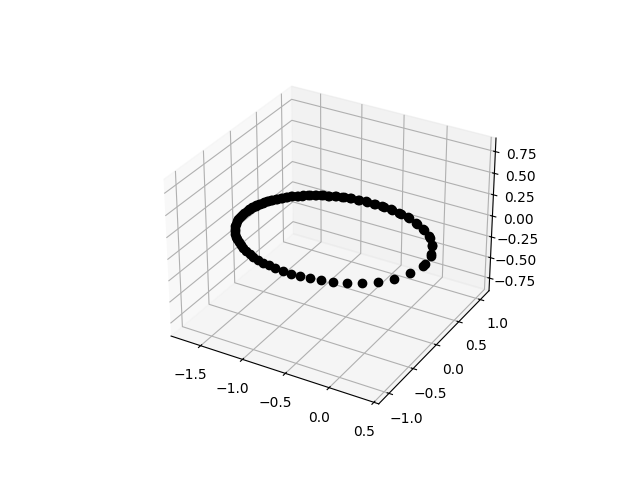

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

camara = celluloid.Camera(fig)
from scipy.optimize import newton
for t in np.linspace(0, 10, 100):
    M = n*(t - tp)
    E = newton(ecuacion_kepler, M)
    f = 2*np.arctan(np.sqrt((1+e)/(1-e))*np.tan(E/2))
    r = p/(1 + e*np.cos(f))

    x = r*np.cos(f)
    y = r*np.sin(f)
    z = 0

    vx = -mu/h*np.sin(f)
    vy = mu/h*(e + np.cos(f))
    vz = 0

    ax.plot(x, y, z, 'o', color='black')
    ax.axis('equal')
    camara.snap() 

- Animemos:

In [56]:
anim = camara.animate()

- Para mostrar la animación se usa:

In [57]:
from IPython.display import HTML
HTML(anim.to_jshtml())

- Usemos la ecuación de Kepler en variables universales para mostrar cómo es posible predecir la posición futura de un cuerpo al variar la velocidad. Para ello nos valdremos de un intereactivo:

In [59]:
from ipywidgets import interact

In [61]:
@interact(factor=(1.01/np.sqrt(2),2.0,0.1))
def compara_universal(factor=1):
    mu = 1 # Como G = 1 y escogimos como unidad de masa la masa solar

    q = 0.4 # en au 
    ve = np.sqrt(2*mu/q) # Le damos a la partícula una velocidad menor a la de escape

    # Posición y velocidad inicial
    rvec = np.array([q, 0, 0])
    r = np.linalg.norm(rvec)

    vvec = np.array([0, factor*ve, 0])
    v = np.linalg.norm(vvec)

    # Constantes de movimiento
    hvec = np.cross(rvec, vvec)
    h = np.linalg.norm(hvec)
    epsilon = v**2/2 - mu/r
    evec = np.cross(vvec, hvec)/mu - rvec/r
    e = np.sqrt(1 + 2*epsilon*h**2/mu**2)
    p = h**2/mu
    a = p/(1 - e**2)
    alfa = 1/a

    # Resolvemos la ecuación en variables universales 
    t = 1
    Muni = np.sqrt(mu)*(t - tp)
    ecuacion_universal = lambda x: Muni - q*x - e*x**3*pc.serie_stumpff(alfa*x**2,3)
    x = newton(ecuacion_universal,Muni)

    # Calculamos la excentricidad verdadera
    if np.isclose(e,1):
        f = 2*np.arctan(x/np.sqrt(p))
        r = p/(1 + e*np.cos(f))
        x = r*np.cos(f)
        y = r*np.sin(f)
        print(f"Estamos en una parábola la anomalía verdadera es: {f}")
    elif e<1:
        E = x/np.sqrt(a)
        f = 2*np.arctan(np.sqrt((1+e)/(1-e))*np.tan(E/2))
        print(f"Estamos en una elipse la anomalía excéntrica es: {E}")
    else:
        F = x/np.sqrt(abs(a))
        f = 2*np.arctan(np.sqrt((e+1)/(e-1))*np.tanh(F/2))
        print(f"Estamos en una hipérbola la anomalía excéntrica es: {F}")

    r = p/(1 + e*np.cos(f))
    x = r*np.cos(f)
    y = r*np.sin(f)
    z = 0

    vx = -mu/h*np.sin(f)
    vy = mu/h*(e + np.cos(f))
    vz = 0

    # Verificación con SPICE
    X = spy.prop2b(mu, list(rvec)+list(vvec), t)

    print(f"Vector de estado (ecuación universal): {[x, y, z, vx, vy, vz]} (en unidades canónicas)")
    print(f"Vector de estado (SPICE): {X}")

interactive(children=(FloatSlider(value=1.0, description='factor', max=2.0, min=0.714177848998413), Output()),…

### Para saber más

Consulte el repositorio en línea del curso para otro material.

<hr/>

*Los cuadernos de clase del curso de astrodinámica también están [disponibles en línea](https://github.com/seap-udea/notas-astrodyn).*